In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv(r"C:\Users\THW_9\Desktop\deskyop\Housing Research LKO\Qualtrics\Housing Policy Data\P.Housing_Merged_2(vii)(expectedAge).csv")

In [349]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' #, 'Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 4
        # , 0 
        ],
      theta=categories,
      fill='toself',    fillcolor = 'red',
    opacity = 0.3,
      name='Option A'
))
fig.add_trace(go.Scatterpolar(
      r=[2.5, 5, 1.5, 4
       #  , 0
        ],
      theta=categories,
      fill='toself',    fillcolor = 'green',
    opacity = 0.3,
      name='Option B'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 1, 5, 4
         #, 0
        ],
      theta=categories,
      fill='toself',    fillcolor = 'blue',
    opacity = 0.3,
      name='Option C'
))

fig.add_trace(go.Scatterpolar(
      r=[1, 4, 5, 4 #, 0
        ],
      theta=categories,
      fill='toself',
    fillcolor = 'yellow',
    opacity = 0.3,
      name='Option D'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [388]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 1
         , 1
        ],
      theta=categories,
      fill='toself',    fillcolor = 'red',
    opacity = 0.3,
      name='Option A'
))
fig.add_trace(go.Scatterpolar(
      r=[2.5, 5, 1.5, 2
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'green',
    opacity = 0.3,
      name='Option B'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 1, 5, 2
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'blue',
    opacity = 0.3,
      name='Option C'
))

fig.add_trace(go.Scatterpolar(
      r=[1, 4, 5, 4 , 5
        ],
      theta=categories,
      fill='toself',
    fillcolor = 'yellow',
    opacity = 0.3,
      name='Option D'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [77]:
# this code tracks the individual level changes

rankt = 1

var1 = '4ChoiceRANK' + str(rankt)
var2 = 'PostChoiceRANK' +str(rankt)

abcd = ['-','A','B','C','D']

df1['nochange'] = 0

for i in range(0,len(df1)):
    for j in range(1,5):
        for k in range(1,5):
            if df1.at[i,var1] == j and df1.at[i,var2]==k:
                df1.at[i,str(rankt)+abcd[j]+'to'+abcd[k]] = 1
              #  print(1)
                if j == k:
                    df1.at[i,'nochange'] = 1
            else:
                df1.at[i,str(rankt)+abcd[j]+'to'+abcd[k]] = 0
           # print( 'i: ' + str(i) + ' ,j: '+ str(j) + ' ,k: ' + str(k))

In [9]:
col1 = ['SN','4ChoiceRANK1','PostChoiceRANK1'] + list(df1.columns[361:]) + list(df1.columns[2:42]) + list(df1.columns[176:269]) + list(df1.columns[269:361])

In [82]:
# To save the changes
# df1[col1].to_csv('P.Housing_Merged_2(viii_ii)(changematrix_ii).csv')

In [84]:
#filter1 = df1.loc[df1[]] #<- this piece of code can be useful to help filter out specific groups of people

df2 = pd.DataFrame()
df2['Pre'] = ''
abcd = ['A','B','C','D']
for i in range(0,4):
    df2.at[i,'Pre'] = abcd[i]
    df2[abcd[i]] = 0

for i in range(0,4):
    for j in abcd:
        var1 = '1' + abcd[i] + 'to' +  j
        # print(var1)
        df2.at[i,j] = df1[var1].sum()
    
#df2    

In [46]:
# this is to help write more readable code

def coloriser(r,g,b,o):
    return 'rgba(' + str(r) + ',' + str(g) + ',' + str(b) + ','+ str(o) + ')' 

In [55]:
# THIS IS TO CREATE COLOUR FOR THE A B C Ds nodes

C1 = []
o = 0.9
for l in range(0,3):
    eig = [0,0,0]
    eig[l] = eig[l] + 255
    C1.append(coloriser(eig[0],eig[1],eig[2],o))

eig = [0,255,255]
C1.append(coloriser(eig[0],eig[1],eig[2],o))

C1=C1+C1

In [62]:
# THIS IS TO CREATE COLOUR FOR THE A B C Ds the Links

C2 = []
o = 0.1
for l in range(0,3):
    eig = [0,0,0]
    eig[l] = eig[l] + 255
    C2.append(coloriser(eig[0],eig[1],eig[2],o))

eig = [0,255,255]
C2.append(coloriser(eig[0],eig[1],eig[2],o))

In [81]:
L =['A','B','C','D','A','B','C','D']

S = []
T = []
V = []

for i in range(0,4):
    for j in range(0,4):
        
        S.append(i) # this creates the source index
        
        T.append(0+4+j)
        
        V.append(df2.at[i,['A', 'B', 'C', 'D'][j]])

In [86]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = 'rgba(255,0,255, 0.8)', width = 0.1),
      label = L,
      color = C1
    ),
    link = dict(
      source = S, 
      target = T,
      value = V,
       # color = C2
  ))])

fig.update_layout(title_text="Switching Pre and Post Policy (Aggregate)", font_size=15)
fig.show()

In [311]:
def descr(filter1):
    
    dfz = filter1
    
    df2 = pd.DataFrame()
    df2['Pre'] = ''
    abcd = ['A','B','C','D']
    for i in range(0,4):
        df2.at[i,'Pre'] = abcd[i]
        df2[abcd[i]] = 0

    for i in range(0,4):
        for j in abcd:
            var1 = '1' + abcd[i] + 'to' +  j
            # print(var1)
            df2.at[i,j] = dfz[var1].sum()

    # THIS IS TO CREATE COLOUR FOR THE A B C Ds nodes

    C1 = []
    o = 0.9
    for l in range(0,3):
        eig = [0,0,0]
        eig[l] = eig[l] + 255
        C1.append(coloriser(eig[0],eig[1],eig[2],o))

    eig = [0,255,255]
    C1.append(coloriser(eig[0],eig[1],eig[2],o))

    C1=C1+C1

    # THIS IS TO CREATE COLOUR FOR THE A B C Ds the Links

    C2 = []
    o = 0.1
    for l in range(0,3):
        eig = [0,0,0]
        eig[l] = eig[l] + 255
        C2.append(coloriser(eig[0],eig[1],eig[2],o))

    eig = [0,255,255]
    C2.append(coloriser(eig[0],eig[1],eig[2],o))
    
    L =['A','B','C','D','A','B','C','D']

    S = []
    T = []
    V = []

    for i in range(0,4):
        for j in range(0,4):
            S.append(i)
            T.append(0+4+j)
            V.append(df2.at[i,['A', 'B', 'C', 'D'][j]])

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = 'rgba(255,0,255, 0.8)', width = 0.1),
          label = L,
          color = C1
        ),
        link = dict(
          source = S, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = T,
          value = V,
           # color = C2
      ))])

    fig.update_layout(title_text="Switching Pre and Post Policy ", font_size=15)
    fig.show()
    
    return percet (S,T,V,L)

# Filtering based on Socioeconomics and other descriptives

In [92]:
dfd = pd.read_csv(r"C:\Users\THW_9\Desktop\deskyop\Housing Research LKO\Qualtrics\Housing Policy Data\[NUS Housing Policy] For Upload\[2B] P.Housing_Merged_2_documentation(v).csv")

In [310]:
def descr1(filter1, feature):
    
    dic1 = eval( dfd.loc[dfd['Variable'] == feature].reset_index().at[0,'Description'] )
    key1= list(dic1.keys())
    
    if key1[0].isnumeric():     
        dicv1 = []
        for i in key1:
            dicv1.append(dic1[i])
    else:
        dicv1 = []
        key1 = []
        templist = list(df1[feature].unique())
        #templist.sort()
        for b in templist:
            if b >=0 :
                key1.append(str(b))
                dicv1.append(b)
        

    
    dfz = filter1
    
    df2 = pd.DataFrame()
    df2['Pre'] = ''
    abcd = ['A','B','C','D']
    for i in range(0,4):
        df2.at[i,'Pre'] = abcd[i]
        df2[abcd[i]] = 0

    for i in range(0,4):
        for j in abcd:
            var1 = '1' + abcd[i] + 'to' +  j
            # print(var1)
            df2.at[i,j] = dfz[var1].sum()

    # THIS IS TO CREATE COLOUR FOR THE A B C Ds nodes

    C1 = []
    o = 0.9
    for l in range(0,3):
        eig = [0,0,0]
        eig[l] = eig[l] + 255
        C1.append(coloriser(eig[0],eig[1],eig[2],o))

    eig = [0,255,255]
    C1.append(coloriser(eig[0],eig[1],eig[2],o))

    C1=C1+C1
    
    C3 =[]
    o=0.8
    for a in range(0,len(dic1)):
        eig = [0,0,0]
        if a%3>0 and a%3 < 4:
            eig[2] = eig[2] + 100
            eig[a%3-1] = eig[a%3-1] + 100
        elif a%3>4:
            eig[1] = eig[1] + 100
            eig[a%3-4] = eig[a%3-4] + 100
        else:
            eig[l] = eig[l] + 255
            C3.append(coloriser(eig[0],eig[1],eig[2],o)) 
    
    C1=C1+C3

    # THIS IS TO CREATE COLOUR FOR THE A B C Ds the Links

    C2 = []
    o = 0.1
    for l in range(0,3):
        eig = [0,0,0]
        eig[l] = eig[l] + 255
        C2.append(coloriser(eig[0],eig[1],eig[2],o))

    eig = [0,255,255]
    C2.append(coloriser(eig[0],eig[1],eig[2],o))
    
    L =['A','B','C','D','A','B','C','D'] + dicv1

    S = []
    T = []
    V = []

    for i in range(0,4):
        for j in range(0,4):
            S.append(i)
            T.append(0+4+j)
            V.append(df2.at[i,['A', 'B', 'C', 'D'][j]])
            
            for k in range(0,len(key1)):
                S.append(0+4+j)
                T.append(0+4+4+k)
                where = '1' + L[i] + 'to' +  L[0+4+j]
                tempval = dfz.loc[dfz[where] == 1].loc[dfz[feature] == int(key1[k])][feature].count()
                V.append(
                    tempval
                )


    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = 'rgba(255,0,255, 0.8)', width = 0.1),
          label = L,
          color = C1
        ),
        link = dict(
          source = S, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = T,
          value = V,
           # color = C2
      ))])

    fig.update_layout(title_text="Switching Pre and Post Policy " + '(' + feature + ')', font_size=20)
    fig.show()
    
    return percet (S,T,V,L)

In [327]:
def percet(S,T,V,L):
    dfm = pd.DataFrame()
    dfm['Source'] = ''
    dfm['Source1'] = 0
    dfm['Target'] = ''
    dfm['Target1'] = 0
    dfm['Value'] = 0
    dfm['Percentage'] = 0
    for i in range(0,len(V)):
        dfm.at[i,'Source'] = L[S[i]]
        dfm.at[i,'Source1'] = S[i]
        dfm.at[i,'Target'] = L[T[i]]
        dfm.at[i,'Target1'] = T[i]
        dfm.at[i,'Value'] = V[i]
    for j in range(0,len(dfm)):        
        t = dfm.loc[dfm['Source1'] == dfm.at[j,'Source1']]['Value'].sum()
        if t != 0:
            percent = dfm.at[j,'Value'] / t
        else:
            percent = 0
        dfm.at[j,'Percentage'] = percent * 100
    return dfm.loc[dfm['Value'] > 0]

In [321]:
df1.loc[df1['Race'] == 2]['Citizen'].sum()

33

In [322]:
descr(df1)

,Source,Source1,Target,Target1,Value,Percentage
0,A,0.0,A,4.0,102.0,67.549669
1,A,0.0,B,5.0,26.0,17.218543
2,A,0.0,C,6.0,8.0,5.298013
3,A,0.0,D,7.0,15.0,9.933775
4,B,1.0,A,4.0,18.0,12.328767
5,B,1.0,B,5.0,114.0,78.082192
6,B,1.0,C,6.0,5.0,3.424658
7,B,1.0,D,7.0,9.0,6.164384
8,C,2.0,A,4.0,17.0,23.611111
9,C,2.0,B,5.0,4.0,5.555556


# A 

In [377]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 4
         , 5 
        ],
      theta=categories,
      fill='toself',    fillcolor = 'orange',
    opacity = 0.3,
      name='Option A (Pre)'
))

fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 1
         , 1
        ],
      theta=categories,
      fill='toself',    fillcolor = 'red',
    opacity = 0.3,
      name='Option A (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [385]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 4
         , 5 
        ],
      theta=categories,
      fill='toself',    fillcolor = 'red',
    opacity = 0.3,
      name='Option A (Pre)'
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [386]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()



fig.add_trace(go.Scatterpolar(
      r=[5, 2, 1.5, 1
         , 1
        ],
      theta=categories,
      fill='toself',    fillcolor = 'red',
    opacity = 0.3,
      name='Option A (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

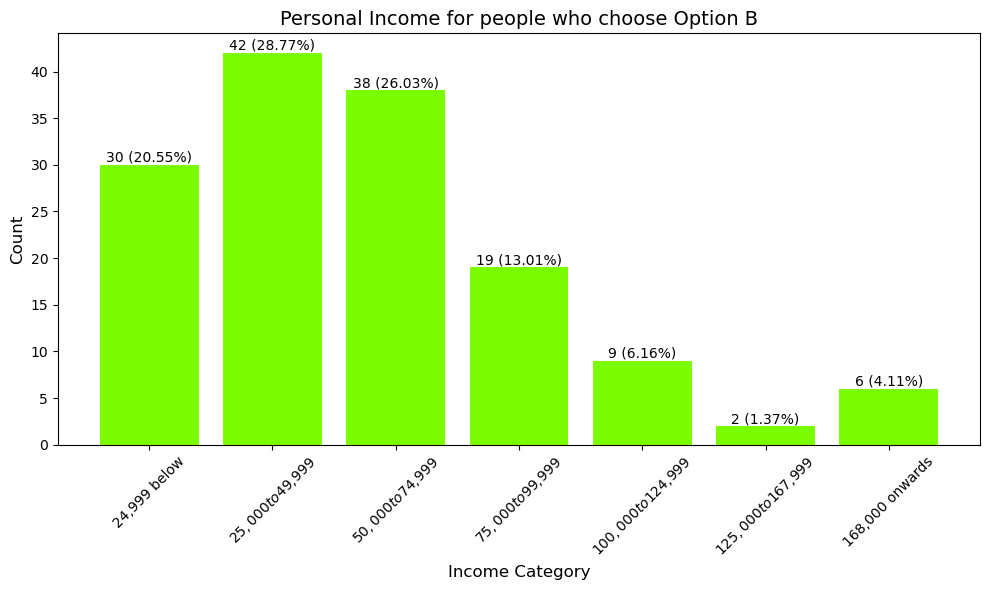

In [477]:


input1 = 1

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].reset_index()

lil = eval(dfd.loc[dfd['Variable']=='PersonalIncome'].reset_index()['Description'][0])

lil['7'] = '24,999 below'
lil['3'] = '168,000 onwards'

filtered_df['PersonalIncome2'] = ''

for i in range(0,len(filtered_df)):
    filtered_df.at[i,'PersonalIncome2'] = lil [ str(filtered_df.at[i,'PersonalIncome']) ]

filtereddf = filtered_df
    
income_counts = filtereddf['PersonalIncome2'].value_counts()

custom_order_dict = {
    '1': '$100,000 to $124,999',
    '2': '$125,000 to $167,999',
    '3': '168,000 onwards',
    '4': '$25,000 to $49,999',
    '5': '$50,000 to $74,999',
    '6': '$75,000 to $99,999',
    '7': '24,999 below'
}

# Define the proper order of the keys based on income range from lowest to highest
proper_order = ['7', '4', '5', '6', '1', '2', '3']

# Reindex income counts based on the custom order
custom_order_list = [custom_order_dict[key] for key in proper_order]

# Assuming `income_counts` contains the categories as the index, we will reindex it
income_counts_sorted = income_counts.reindex(custom_order_list)

# Calculate percentages
income_percentages = (income_counts_sorted / income_counts_sorted.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # You can adjust the size of the figure as needed
bars = plt.bar(income_counts_sorted.index, income_counts_sorted, color='LawnGreen')

# Adding labels and title
plt.title('Personal Income for people who choose Option ' + ['A','B','C','D'][input1]  , fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, income_counts_sorted, income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.tight_layout()
plt.show()

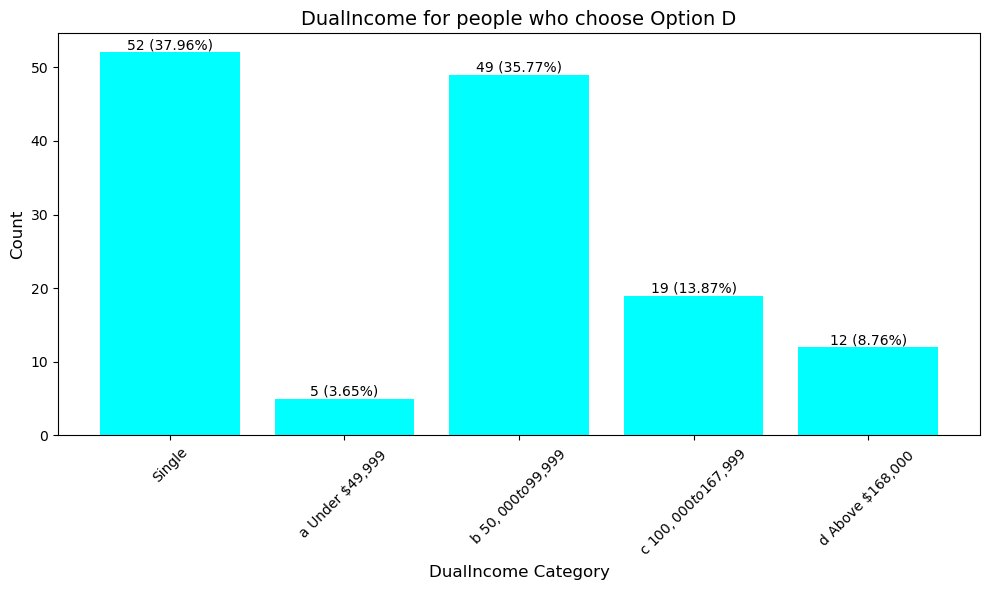

In [484]:
input1 = 3

Var1 = 'DualIncome'
Nil = 'Single'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

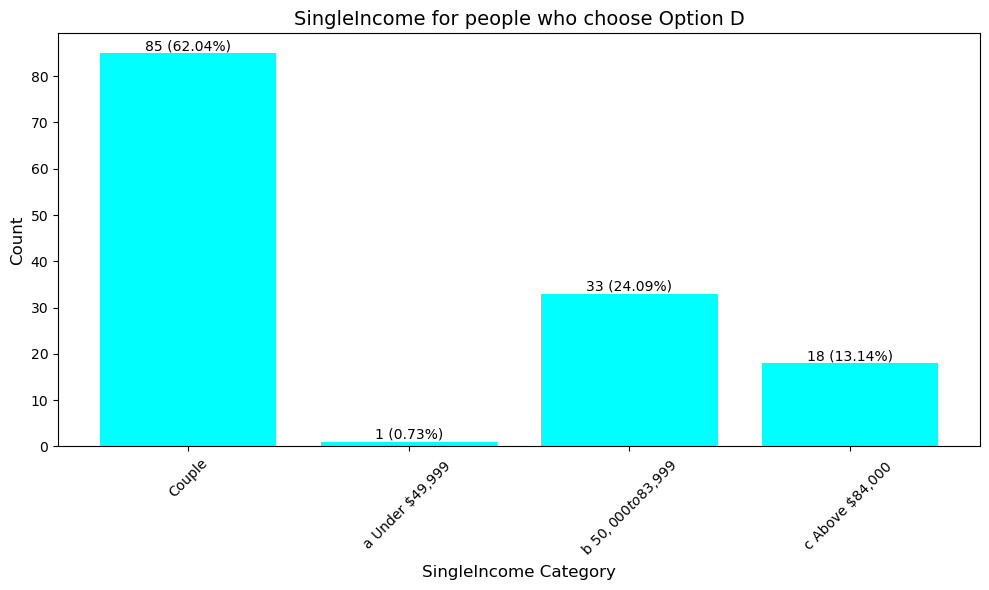

In [486]:
input1 = 3

Var1 = 'SingleIncome'
Nil = 'Couple'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

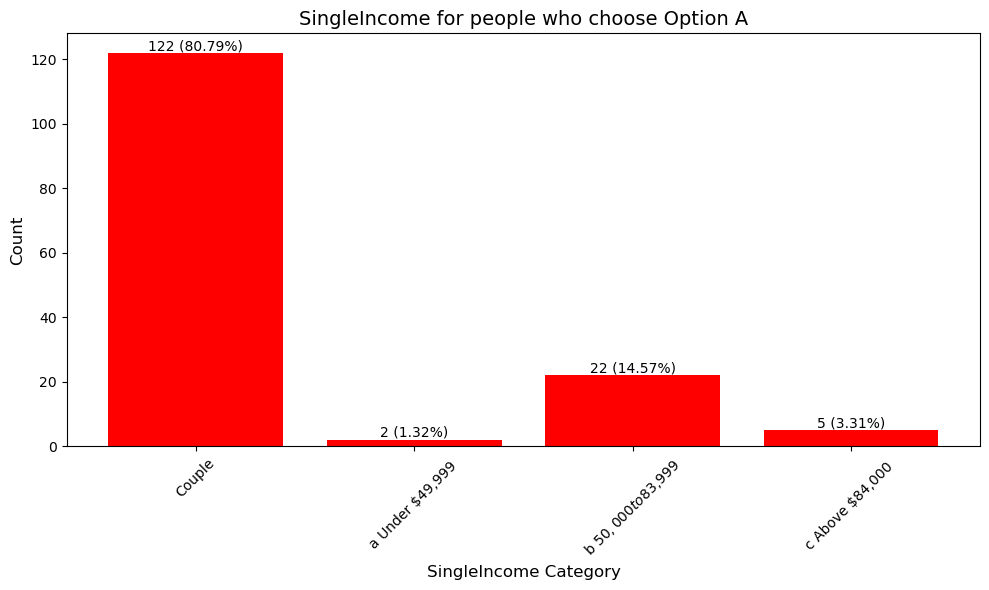

In [495]:
input1 = 0

Var1 = 'SingleIncome'
Nil = 'Couple'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

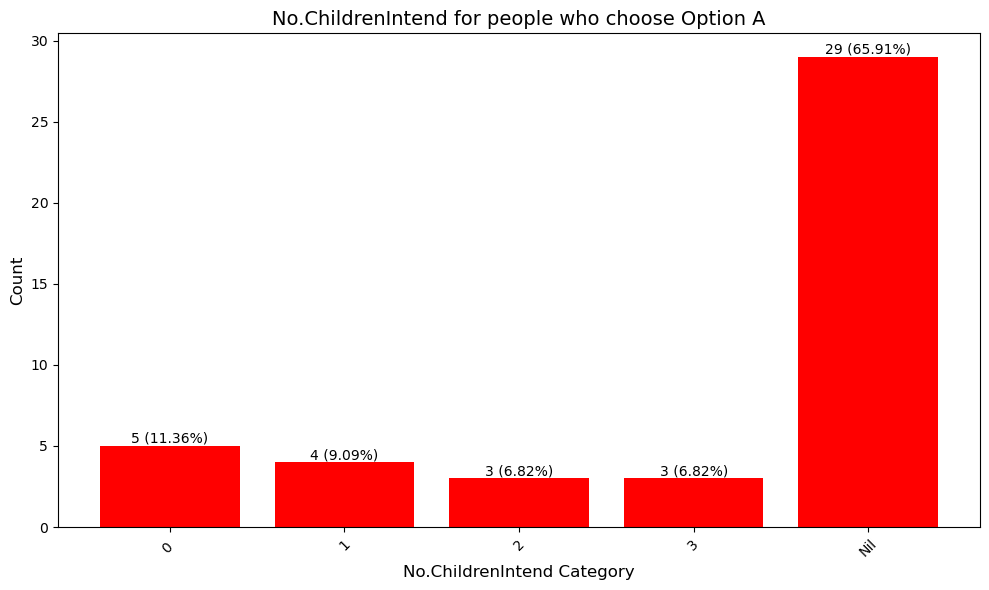

In [510]:
input1 = 0

Var1 = 'No.ChildrenIntend'
Nil = 'Nil'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].loc[df1['Marital'] == 1].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

{'Numbers': 'Numbers', 'Years': 'Years'}

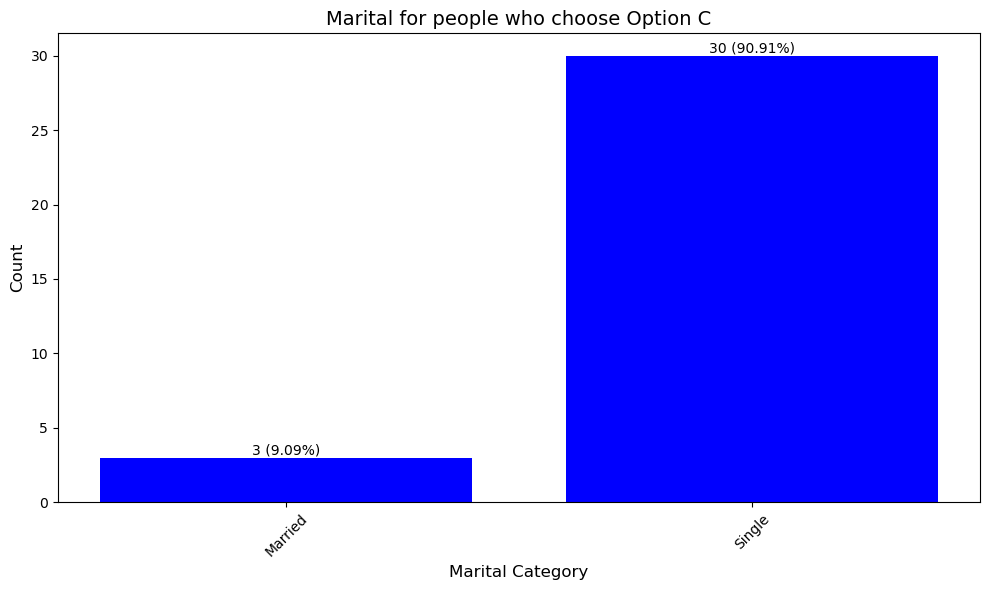

In [494]:
input1 = 2

Var1 = 'Marital'
Nil = 'Nil'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].loc[df1['SingleIncome']>0].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

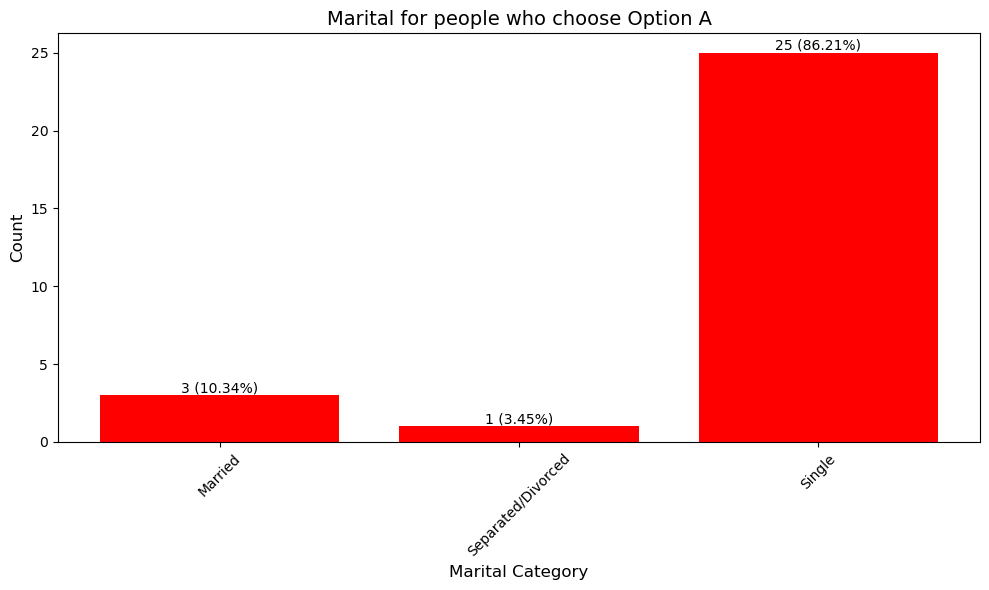

In [496]:
input1 = 0

Var1 = 'Marital'
Nil = 'Nil'

filtered_df = df1.loc[df1['4ChoiceRANK1'] == [1,2,3,4][input1]].loc[df1['SingleIncome']>0].reset_index()

lil = eval(dfd.loc[dfd['Variable']==Var1].reset_index()['Description'][0])

filtered_df[Var1+'2'] = ''

for i in range(0,len(filtered_df)):
    a = filtered_df.at[i,Var1]
    if a > 0:
        b = lil [ str(int(a)) ]
        if '(' in b and ')' in b:
            b = b. split('(') [0]
        filtered_df.at[i,Var1+'2'] = b
    else: 
        filtered_df.at[i,Var1+'2'] = Nil

Var2 = Var1+'2'

filtereddf = filtered_df

dual_income_counts = filtereddf[Var2].value_counts().sort_index()

# Calculate percentages
dual_income_percentages = (dual_income_counts / dual_income_counts.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dual_income_counts.index, dual_income_counts, color=['Red','LawnGreen','Blue' ,'Cyan'][input1])

# Adding labels and title
plt.title( Var1 + ' for people who choose Option ' + ['A','B','C','D'][input1], fontsize=14)
plt.xlabel( Var1 + ' Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding counts and percentages on top of each bar
for bar, count, percentage in zip(bars, dual_income_counts, dual_income_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{count} ({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [488]:
lil

{'1': 'a Under $49,999 (<$4k per month)',
 '2': 'b $50,000 to $83,999 ($4k to $7k per month)',
 '3': 'c Above $84,000 (>$7k per month)'}

'1.0'

In [436]:
filtered_df = df1.loc[df1['4ChoiceRANK1'] == 1].reset_index()
print(filtered_df['PersonalIncome'].head()) 

0    5
1    5
2    4
3    4
4    5
Name: PersonalIncome, dtype: int64


In [435]:
df1['PersonalIncome'].head()

0    5
1    7
2    6
3    1
4    4
Name: PersonalIncome, dtype: int64

In [323]:
descr(df1.loc[df1['4ChoiceRANK1'] == 1])

,Source,Source1,Target,Target1,Value,Percentage
0,A,0.0,A,4.0,102.0,67.549669
1,A,0.0,B,5.0,26.0,17.218543
2,A,0.0,C,6.0,8.0,5.298013
3,A,0.0,D,7.0,15.0,9.933775


In [324]:
descr1(df1.loc[df1['1AtoA']>=1], 'No.ChildrenIntend')

,Source,Source1,Target,Target1,Value,Percentage
0,A,0.0,A,4.0,102.0,100.000000
1,A,4.0,0 (Don't want children),8.0,35.0,45.454545
2,A,4.0,1,9.0,12.0,15.584416
3,A,4.0,2,10.0,26.0,33.766234
4,A,4.0,3,11.0,3.0,3.896104
5,A,4.0,More than 5,12.0,1.0,1.298701


In [325]:
descr1(df1.loc[df1['1AtoB']>=1], 'No.ChildrenIntend')

,Source,Source1,Target,Target1,Value,Percentage
6,A,0.0,B,5.0,26.0,100.000000
7,B,5.0,0 (Don't want children),8.0,2.0,9.090909
8,B,5.0,1,9.0,4.0,18.181818
9,B,5.0,2,10.0,10.0,45.454545
10,B,5.0,3,11.0,6.0,27.272727


# B

In [380]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[2.5, 5, 1.5, 4
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'green',
    opacity = 0.3,
      name='Option B (Pre)'
))

fig.add_trace(go.Scatterpolar(
      r=[2.5, 5, 1.5, 4
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'green',
    opacity = 0.3,
      name='Option B (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [383]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
      r=[2.5, 5, 1.5, 4
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'green',
    opacity = 0.3,
      name='Option B (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [328]:
descr(df1.loc[df1['4ChoiceRANK1'] == 2])

,Source,Source1,Target,Target1,Value,Percentage
4,B,1.0,A,4.0,18.0,12.328767
5,B,1.0,B,5.0,114.0,78.082192
6,B,1.0,C,6.0,5.0,3.424658
7,B,1.0,D,7.0,9.0,6.164384


In [329]:
descr1(df1.loc[df1['1BtoA']>=1], 'Rank_Location')

,Source,Source1,Target,Target1,Value,Percentage
24,B,1.0,A,4.0,18.0,100.000000
25,A,4.0,3,8.0,3.0,16.666667
26,A,4.0,5,9.0,3.0,16.666667
27,A,4.0,1,10.0,5.0,27.777778
28,A,4.0,2,11.0,4.0,22.222222
29,A,4.0,4,12.0,3.0,16.666667


In [500]:
descr1(df1.loc[df1['1BtoA']>=1], 'ChangeFamilyPlanning')

,Source,Source1,Target,Target1,Value,Percentage
24,B,1.0,A,4.0,18.0,100.000000
25,A,4.0,No.,8.0,13.0,72.222222
28,A,4.0,"Yes, I will have fewer children.",11.0,4.0,22.222222
29,A,4.0,"Yes, I will have more children.",12.0,1.0,5.555556


In [514]:
descr1(df1.loc[df1['1BtoA']>=1], 'No.ChildrenIntend')

,Source,Source1,Target,Target1,Value,Percentage
24,B,1.0,A,4.0,18.0,100.000000
25,A,4.0,0 (Don't want children),8.0,3.0,27.272727
26,A,4.0,1,9.0,1.0,9.090909
27,A,4.0,2,10.0,6.0,54.545455
28,A,4.0,3,11.0,1.0,9.090909


In [330]:
descr1(df1.loc[df1['1BtoB']>=1], 'Rank_Size')

,Source,Source1,Target,Target1,Value,Percentage
30,B,1.0,B,5.0,114.0,100.000000
31,B,5.0,2,8.0,44.0,38.596491
32,B,5.0,4,9.0,12.0,10.526316
33,B,5.0,5,10.0,16.0,14.035088
34,B,5.0,3,11.0,18.0,15.789474
35,B,5.0,1,12.0,24.0,21.052632


# C

In [387]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[4, 1, 5, 5
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'blue',
    opacity = 0.3,
      name='Option C (Pre)'
))

fig.add_trace(go.Scatterpolar(
      r=[4, 1, 5, 2
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'blue',
    opacity = 0.3,
      name='Option C (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [390]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[4, 1, 5, 5
         , 5
        ],
      theta=categories,
      fill='toself',    fillcolor = 'blue',
    opacity = 0.3,
      name='Option C (Pre)'
))




fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [331]:
descr(df1.loc[df1['4ChoiceRANK1'] == 3])

,Source,Source1,Target,Target1,Value,Percentage
8,C,2.0,A,4.0,17.0,23.611111
9,C,2.0,B,5.0,4.0,5.555556
10,C,2.0,C,6.0,41.0,56.944444
11,C,2.0,D,7.0,10.0,13.888889


In [370]:
descr1(df1.loc[df1['1CtoC']>=1], 'CentralReturnsPost')

,Source,Source1,Target,Target1,Value,Percentage
80,C,2.0,C,6.0,41.0,100.000000
81,C,6.0,a Much lower,8.0,1.0,2.439024
82,C,6.0,b Moderately lower,9.0,2.0,4.878049
83,C,6.0,c Slightly lower,10.0,4.0,9.756098
84,C,6.0,d About the same,11.0,12.0,29.268293
85,C,6.0,e Slightly higher,12.0,12.0,29.268293
86,C,6.0,f Moderately higher,13.0,6.0,14.634146
87,C,6.0,g Much higher,14.0,4.0,9.756098


In [393]:
descr1(df1.loc[df1['1CtoA']>=1], 'Rank_Gains')

,Source,Source1,Target,Target1,Value,Percentage
48,C,2.0,A,4.0,17.0,100.000000
50,A,4.0,2,9.0,3.0,17.647059
51,A,4.0,4,10.0,5.0,29.411765
52,A,4.0,3,11.0,6.0,35.294118
53,A,4.0,5,12.0,3.0,17.647059


In [396]:
descr1(df1.loc[df1['1CtoC']>=1], 'PersonalIncome')

,Source,Source1,Target,Target1,Value,Percentage
80,C,2.0,C,6.0,41.0,100.000000
81,C,6.0,"$100,000 to $124,999",8.0,3.0,7.317073
82,C,6.0,"$125,000 to $167,999",9.0,1.0,2.439024
83,C,6.0,"$168,000 and beyond",10.0,2.0,4.878049
84,C,6.0,"$25,000 to $49,999",11.0,6.0,14.634146
85,C,6.0,"$50,000 to $74,999",12.0,9.0,21.951220
86,C,6.0,"$75,000 to $99,999",13.0,12.0,29.268293
87,C,6.0,"Under 24,999",14.0,8.0,19.512195


In [395]:
descr1(df1.loc[df1['1CtoA']>=1], 'PersonalIncome')

,Source,Source1,Target,Target1,Value,Percentage
64,C,2.0,A,4.0,17.0,100.000000
65,A,4.0,"$100,000 to $124,999",8.0,2.0,11.764706
66,A,4.0,"$125,000 to $167,999",9.0,1.0,5.882353
67,A,4.0,"$168,000 and beyond",10.0,1.0,5.882353
68,A,4.0,"$25,000 to $49,999",11.0,4.0,23.529412
69,A,4.0,"$50,000 to $74,999",12.0,4.0,23.529412
70,A,4.0,"$75,000 to $99,999",13.0,2.0,11.764706
71,A,4.0,"Under 24,999",14.0,3.0,17.647059


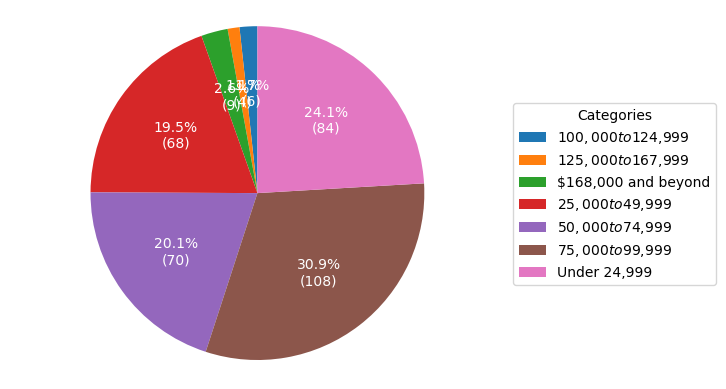

In [410]:
import matplotlib.pyplot as plt
# Filter the DataFrame (example: filter Category 'A' and 'B')
filtered_df = df1.loc[df1['4ChoiceRANK1'] == 3].reset_index()

lil = eval(dfd.loc[dfd['Variable']=='PersonalIncome']['Description'][97])

filtered_df['PersonalIncome2'] = ''

for i in range(0,len(filtered_df)):
    filtered_df.at[i,'PersonalIncome2'] = lil [ str(filtered_df.at[i,'PersonalIncome']) ]

# Group by Category and sum values
category_sum = filtered_df.groupby('PersonalIncome2')['PersonalIncome'].sum()

# Create a pie chart without slice labels
fig, ax = plt.subplots()
wedges, _, autotexts = ax.pie(category_sum, labels=None, autopct=lambda p: f'{p:.1f}%\n({p*category_sum.sum()/100:.0f})', startangle=90)

# Set the text on the slices (percentage and value)
for autotext in autotexts:
    autotext.set_color('white')  # Set the text color to white for better visibility

# Add a legend with category names
ax.legend(wedges, category_sum.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')  

# Show the plot
plt.show()

In [405]:
lil = eval(dfd.loc[dfd['Variable']=='PersonalIncome']['Description'][97])

{'1': '$100,000 to $124,999',
 '2': '$125,000 to $167,999',
 '3': '$168,000 and beyond',
 '4': '$25,000 to $49,999',
 '5': '$50,000 to $74,999',
 '6': '$75,000 to $99,999',
 '7': 'Under 24,999'}

In [382]:
import plotly.graph_objects as go

categories = ['Location','Size','Move-In Time',
              'Selling Time' , 'Avoids Clawback'
             ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 4, 5, 4 , 5
        ],
      theta=categories,
      fill='toself',
    fillcolor = 'yellow',
    opacity = 0.3,
      name='Option D (Pre)'
))


fig.add_trace(go.Scatterpolar(
      r=[1, 4, 5, 4 , 5
        ],
      theta=categories,
      fill='toself',
    fillcolor = 'yellow',
    opacity = 0.3,
      name='Option D (Post)'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

In [371]:
descr(df1.loc[df1['4ChoiceRANK1'] == 4])

,Source,Source1,Target,Target1,Value,Percentage
12,D,3.0,A,4.0,15.0,10.948905
13,D,3.0,B,5.0,13.0,9.489051
14,D,3.0,C,6.0,8.0,5.839416
15,D,3.0,D,7.0,101.0,73.722628


In [372]:
descr1(df1.loc[df1['1DtoB']>=1], 'Rank_Size')

,Source,Source1,Target,Target1,Value,Percentage
78,D,3.0,B,5.0,13.0,100.000000
79,B,5.0,2,8.0,4.0,30.769231
81,B,5.0,5,10.0,1.0,7.692308
82,B,5.0,3,11.0,4.0,30.769231
83,B,5.0,1,12.0,4.0,30.769231


In [373]:
descr1(df1.loc[df1['1DtoB']>=1], 'Rank_MoveInTime')

,Source,Source1,Target,Target1,Value,Percentage
78,D,3.0,B,5.0,13.0,100.000000
79,B,5.0,4,8.0,6.0,46.153846
80,B,5.0,3,9.0,4.0,30.769231
81,B,5.0,5,10.0,1.0,7.692308
82,B,5.0,1,11.0,1.0,7.692308
83,B,5.0,2,12.0,1.0,7.692308


# Making Matrix tables

In [540]:
for h in ['PolicyDownpayment', 'PolicyTDSR']:
    for i in ['Pre','Post']:
        dfa [i + h + '1'] = 0.0
        for j in range(0,len(dfa)):
            if type( dfa.at [ j , i + h] ) == str : 
                dfa .at [j, i + h + '1'] = int( dfa.at [ j , i + h].split('%')[0] )
            elif  '%' in dfa.at [ j , i + h + 'Single'] :
                dfa .at [j, i + h + '1'] = int( dfa.at [ j , i + h + 'Single'].split('%')[0] )
                print('Single')
            print(j , dfa .at [j, i + h + '1'])
            




0 35.0
1 20.0
2 20.0
3 50.0
4 30.0
5 50.0
6 30.0
Single
7 20.0
8 20.0
9 70.0
10 20.0
Single
11 30.0
12 50.0
13 20.0
Single
14 20.0
15 20.0
16 20.0
17 20.0
18 20.0
19 30.0
20 20.0
21 25.0
22 20.0
23 50.0
24 20.0
25 25.0
26 20.0
27 20.0
Single
28 20.0
Single
29 30.0
Single
30 50.0
31 20.0
32 50.0
33 50.0
34 20.0
Single
35 20.0
36 30.0
Single
37 20.0
38 20.0
39 20.0
40 25.0
41 20.0
42 20.0
43 20.0
44 20.0
45 20.0
46 20.0
47 20.0
48 30.0
49 50.0
50 20.0
51 50.0
Single
52 25.0
53 20.0
54 70.0
55 20.0
56 35.0
57 20.0
58 80.0
59 30.0
60 20.0
61 20.0
Single
62 50.0
63 50.0
64 20.0
65 100.0
66 20.0
67 20.0
Single
68 20.0
Single
69 20.0
70 50.0
71 20.0
72 20.0
73 20.0
74 20.0
75 20.0
Single
76 50.0
77 25.0
78 25.0
Single
79 20.0
80 20.0
81 20.0
82 60.0
83 20.0
84 70.0
85 50.0
Single
86 30.0
Single
87 20.0
88 35.0
89 20.0
90 50.0
91 20.0
Single
92 30.0
93 20.0
94 25.0
95 20.0
96 50.0
Single
97 20.0
98 20.0
99 60.0
100 50.0
101 25.0
102 25.0
103 50.0
104 30.0
105 20.0
Single
106 35.0
107 50.0
Sing

In [564]:


var1 = ['PrePolicyDownpayment1' , 'PostPolicyDownpayment1']

newvarname = ['Downpay(Pre)','Downpay(Post)']

dimension = len(var1)

abcd = ['A','B','C','D']

dfa = df1

dfz = pd.DataFrame()
dfz['Pre']=''
dfz.at[0,'Pre'] = 'Variables'

for post in [0,1,2,3]:
    for k in range(0,dimension):
        dfz[abcd[post]+'(Post)'+str(k)] = 0

for pre in [0,1,2,3]:
    for post in [0,1,2,3]:
        for k in range(0,dimension):
            
            
            
            if pre == 0: 
                dfz.at[0,abcd[post]+'(Post)'+str(k)] =  newvarname[k]
            
            print(i,abcd[pre],post, abcd[post])
            b = '1' + abcd[pre] + 'to' + abcd[post]
            print(b)
            a = dfa.loc[ dfa [ b ] == 1] [var1[k]] .mean()
            print(a , var1[k])
            dfz.at[pre+1,'Pre'] = abcd[pre]
            dfz.at[pre+1,abcd[post]+'(Post)'+str(k)] = a

print(dfz)

3 A 0 A
1AtoA
30.235294117647058 PrePolicyDownpayment1
3 A 0 A
1AtoA
30.666666666666668 PostPolicyDownpayment1
3 A 1 B
1AtoB
29.23076923076923 PrePolicyDownpayment1
3 A 1 B
1AtoB
28.923076923076923 PostPolicyDownpayment1
3 A 2 C
1AtoC
35.625 PrePolicyDownpayment1
3 A 2 C
1AtoC
35.625 PostPolicyDownpayment1
3 A 3 D
1AtoD
47.666666666666664 PrePolicyDownpayment1
3 A 3 D
1AtoD
45.0 PostPolicyDownpayment1
3 B 0 A
1BtoA
28.61111111111111 PrePolicyDownpayment1
3 B 0 A
1BtoA
30.833333333333332 PostPolicyDownpayment1
3 B 1 B
1BtoB
37.01754385964912 PrePolicyDownpayment1
3 B 1 B
1BtoB
35.35087719298246 PostPolicyDownpayment1
3 B 2 C
1BtoC
23.0 PrePolicyDownpayment1
3 B 2 C
1BtoC
23.4 PostPolicyDownpayment1
3 B 3 D
1BtoD
25.555555555555557 PrePolicyDownpayment1
3 B 3 D
1BtoD
27.77777777777778 PostPolicyDownpayment1
3 C 0 A
1CtoA
33.23529411764706 PrePolicyDownpayment1
3 C 0 A
1CtoA
32.529411764705884 PostPolicyDownpayment1
3 C 1 B
1CtoB
21.25 PrePolicyDownpayment1
3 C 1 B
1CtoB
22.5 PostPolicyDo

In [565]:
dfz

,Pre,A(Post)0,A(Post)1,B(Post)0,B(Post)1,C(Post)0,C(Post)1,D(Post)0,D(Post)1
0,Variables,Downpay(Pre),Downpay(Post),Downpay(Pre),Downpay(Post),Downpay(Pre),Downpay(Post),Downpay(Pre),Downpay(Post)
1,A,30.235294,30.666667,29.230769,28.923077,35.625,35.625,47.666667,45.0
2,B,28.611111,30.833333,37.017544,35.350877,23.0,23.4,25.555556,27.777778
3,C,33.235294,32.529412,21.25,22.5,30.243902,30.121951,40.0,43.5
4,D,46.0,44.0,37.230769,31.923077,27.5,25.0,34.356436,35.346535


In [566]:


var1 = ['PrePolicyTDSR1' , 'PostPolicyTDSR1']

newvarname = ['DSR(Pre)','DSR(Post)']

dimension = len(var1)

abcd = ['A','B','C','D']

dfa = df1

dfz = pd.DataFrame()
dfz['Pre']=''
dfz.at[0,'Pre'] = 'Variables'

for post in [0,1,2,3]:
    for k in range(0,dimension):
        dfz[abcd[post]+'(Post)'+str(k)] = 0

for pre in [0,1,2,3]:
    for post in [0,1,2,3]:
        for k in range(0,dimension):
            
            
            
            if pre == 0: 
                dfz.at[0,abcd[post]+'(Post)'+str(k)] =  newvarname[k]
            
            print(i,abcd[pre],post, abcd[post])
            b = '1' + abcd[pre] + 'to' + abcd[post]
            print(b)
            a = dfa.loc[ dfa [ b ] == 1] [var1[k]] .mean()
            print(a , var1[k])
            dfz.at[pre+1,'Pre'] = abcd[pre]
            dfz.at[pre+1,abcd[post]+'(Post)'+str(k)] = a

print(dfz)

3 A 0 A
1AtoA
25.637254901960784 PrePolicyTDSR1
3 A 0 A
1AtoA
25.80392156862745 PostPolicyTDSR1
3 A 1 B
1AtoB
20.0 PrePolicyTDSR1
3 A 1 B
1AtoB
20.46153846153846 PostPolicyTDSR1
3 A 2 C
1AtoC
36.25 PrePolicyTDSR1
3 A 2 C
1AtoC
34.375 PostPolicyTDSR1
3 A 3 D
1AtoD
31.866666666666667 PrePolicyTDSR1
3 A 3 D
1AtoD
34.2 PostPolicyTDSR1
3 B 0 A
1BtoA
25.833333333333332 PrePolicyTDSR1
3 B 0 A
1BtoA
25.0 PostPolicyTDSR1
3 B 1 B
1BtoB
26.710526315789473 PrePolicyTDSR1
3 B 1 B
1BtoB
27.842105263157894 PostPolicyTDSR1
3 B 2 C
1BtoC
24.0 PrePolicyTDSR1
3 B 2 C
1BtoC
22.0 PostPolicyTDSR1
3 B 3 D
1BtoD
25.555555555555557 PrePolicyTDSR1
3 B 3 D
1BtoD
25.0 PostPolicyTDSR1
3 C 0 A
1CtoA
32.05882352941177 PrePolicyTDSR1
3 C 0 A
1CtoA
34.705882352941174 PostPolicyTDSR1
3 C 1 B
1CtoB
21.25 PrePolicyTDSR1
3 C 1 B
1CtoB
25.0 PostPolicyTDSR1
3 C 2 C
1CtoC
31.70731707317073 PrePolicyTDSR1
3 C 2 C
1CtoC
32.4390243902439 PostPolicyTDSR1
3 C 3 D
1CtoD
29.0 PrePolicyTDSR1
3 C 3 D
1CtoD
30.0 PostPolicyTDSR1
3 D 0 

In [567]:
dfz

,Pre,A(Post)0,A(Post)1,B(Post)0,B(Post)1,C(Post)0,C(Post)1,D(Post)0,D(Post)1
0,Variables,DSR(Pre),DSR(Post),DSR(Pre),DSR(Post),DSR(Pre),DSR(Post),DSR(Pre),DSR(Post)
1,A,25.637255,25.803922,20.0,20.461538,36.25,34.375,31.866667,34.2
2,B,25.833333,25.0,26.710526,27.842105,24.0,22.0,25.555556,25.0
3,C,32.058824,34.705882,21.25,25.0,31.707317,32.439024,29.0,30.0
4,D,37.333333,35.333333,22.923077,24.230769,30.0,33.125,30.19802,30.09901


float

In [569]:


var1 = ['expectedAge' ]

newvarname = ['AgePurchase']

dimension = len(var1)

abcd = ['A','B','C','D']

dfa = df1

dfz = pd.DataFrame()
dfz['Pre']=''
dfz.at[0,'Pre'] = 'Variables'

for post in [0,1,2,3]:
    for k in range(0,dimension):
        dfz[abcd[post]+'(Post)'+str(k)] = 0

for pre in [0,1,2,3]:
    for post in [0,1,2,3]:
        for k in range(0,dimension):
            
            
            
            if pre == 0: 
                dfz.at[0,abcd[post]+'(Post)'+str(k)] =  newvarname[k]
            
            print(i,abcd[pre],post, abcd[post])
            b = '1' + abcd[pre] + 'to' + abcd[post]
            print(b)
            a = dfa.loc[ dfa [ b ] == 1] [var1[k]] .mean()
            print(a , var1[k])
            dfz.at[pre+1,'Pre'] = abcd[pre]
            dfz.at[pre+1,abcd[post]+'(Post)'+str(k)] = a

print(dfz)

3 A 0 A
1AtoA
33.88235294117647 expectedAge
3 A 1 B
1AtoB
30.46153846153846 expectedAge
3 A 2 C
1AtoC
33.625 expectedAge
3 A 3 D
1AtoD
33.333333333333336 expectedAge
3 B 0 A
1BtoA
31.77777777777778 expectedAge
3 B 1 B
1BtoB
31.964912280701753 expectedAge
3 B 2 C
1BtoC
35.4 expectedAge
3 B 3 D
1BtoD
33.666666666666664 expectedAge
3 C 0 A
1CtoA
33.294117647058826 expectedAge
3 C 1 B
1CtoB
33.25 expectedAge
3 C 2 C
1CtoC
34.170731707317074 expectedAge
3 C 3 D
1CtoD
33.7 expectedAge
3 D 0 A
1DtoA
33.53333333333333 expectedAge
3 D 1 B
1DtoB
33.38461538461539 expectedAge
3 D 2 C
1DtoC
40.375 expectedAge
3 D 3 D
1DtoD
34.722772277227726 expectedAge
         Pre     A(Post)0     B(Post)0     C(Post)0     D(Post)0
0  Variables  AgePurchase  AgePurchase  AgePurchase  AgePurchase
1          A    33.882353    30.461538       33.625    33.333333
2          B    31.777778    31.964912         35.4    33.666667
3          C    33.294118        33.25    34.170732         33.7
4          D    33.533333

In [570]:
dfz

,Pre,A(Post)0,B(Post)0,C(Post)0,D(Post)0
0,Variables,AgePurchase,AgePurchase,AgePurchase,AgePurchase
1,A,33.882353,30.461538,33.625,33.333333
2,B,31.777778,31.964912,35.4,33.666667
3,C,33.294118,33.25,34.170732,33.7
4,D,33.533333,33.384615,40.375,34.722772


In [571]:


var1 = ['No.Children' ]

newvarname = ['ExtgChildren']

dimension = len(var1)

abcd = ['A','B','C','D']

dfa = df1

dfz = pd.DataFrame()
dfz['Pre']=''
dfz.at[0,'Pre'] = 'Variables'

for post in [0,1,2,3]:
    for k in range(0,dimension):
        dfz[abcd[post]+'(Post)'+str(k)] = 0

for pre in [0,1,2,3]:
    for post in [0,1,2,3]:
        for k in range(0,dimension):
            
            
            
            if pre == 0: 
                dfz.at[0,abcd[post]+'(Post)'+str(k)] =  newvarname[k]
            
            print(i,abcd[pre],post, abcd[post])
            b = '1' + abcd[pre] + 'to' + abcd[post]
            print(b)
            a = dfa.loc[ dfa [ b ] == 1] [var1[k]] .mean()
            print(a , var1[k])
            dfz.at[pre+1,'Pre'] = abcd[pre]
            dfz.at[pre+1,abcd[post]+'(Post)'+str(k)] = a

print(dfz)

3 A 0 A
1AtoA
0.35294117647058826 No.Children
3 A 1 B
1AtoB
0.2692307692307692 No.Children
3 A 2 C
1AtoC
0.5 No.Children
3 A 3 D
1AtoD
0.5333333333333333 No.Children
3 B 0 A
1BtoA
0.6666666666666666 No.Children
3 B 1 B
1BtoB
0.5 No.Children
3 B 2 C
1BtoC
0.6 No.Children
3 B 3 D
1BtoD
0.4444444444444444 No.Children
3 C 0 A
1CtoA
0.23529411764705882 No.Children
3 C 1 B
1CtoB
0.5 No.Children
3 C 2 C
1CtoC
0.14634146341463414 No.Children
3 C 3 D
1CtoD
0.1 No.Children
3 D 0 A
1DtoA
0.4666666666666667 No.Children
3 D 1 B
1DtoB
0.6923076923076923 No.Children
3 D 2 C
1DtoC
0.125 No.Children
3 D 3 D
1DtoD
0.46534653465346537 No.Children
         Pre      A(Post)0      B(Post)0      C(Post)0      D(Post)0
0  Variables  ExtgChildren  ExtgChildren  ExtgChildren  ExtgChildren
1          A      0.352941      0.269231           0.5      0.533333
2          B      0.666667           0.5           0.6      0.444444
3          C      0.235294           0.5      0.146341           0.1
4          D      0

In [572]:
dfz

,Pre,A(Post)0,B(Post)0,C(Post)0,D(Post)0
0,Variables,ExtgChildren,ExtgChildren,ExtgChildren,ExtgChildren
1,A,0.352941,0.269231,0.5,0.533333
2,B,0.666667,0.5,0.6,0.444444
3,C,0.235294,0.5,0.146341,0.1
4,D,0.466667,0.692308,0.125,0.465347


In [1]:
1

1